In [ ]:
%load_ext autoreload
%autoreload 2

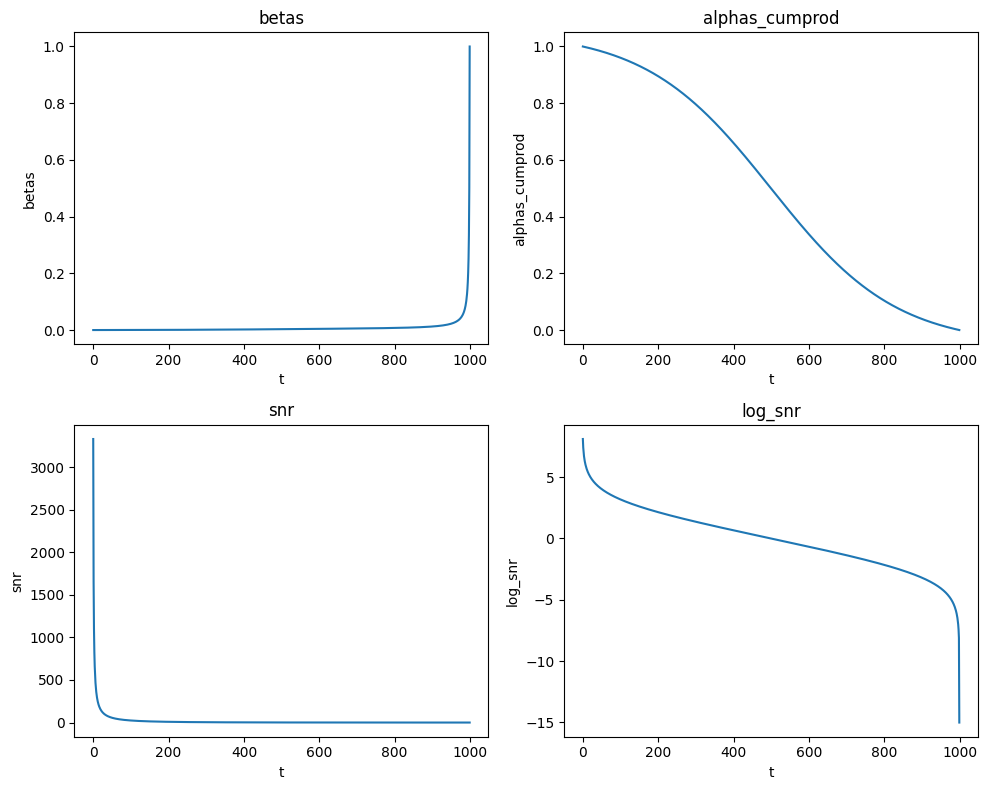

In [20]:
from plaid.diffusion.guided import GaussianDiffusion
from plaid.utils import LatentScaler
from plaid.diffusion.beta_schedulers import SigmoidBetaScheduler, CosineBetaScheduler
from matplotlib import pyplot as plt
import torch
import torch.nn.functional as F

beta_schedule = SigmoidBetaScheduler()
betas = beta_schedule(1000)
alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)
snr = alphas_cumprod / (1 - alphas_cumprod)
to_plot = {
    'betas': betas,
    'alphas_cumprod': alphas_cumprod,
    'snr': snr,
    'log_snr': snr.log()
}
to_plot_keys = list(to_plot.keys())

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
for i in range(4):
    axs[i].plot(to_plot[to_plot_keys[i]])
    axs[i].set_title(f'{to_plot_keys[i]}')
    axs[i].set_xlabel('t')
    axs[i].set_ylabel(f'{to_plot_keys[i]}')

plt.tight_layout()
plt.show()